# 02: Constraint Modelling:

In [1]:
# ============================
# CELL 1 — LOAD STAGE 1 SYSTEM STATE
# ============================

import pandas as pd
import numpy as np

stage1_df = pd.read_csv(
    "stage1_system_state_2025.csv",
    parse_dates=["DateTime"],
    index_col="DateTime"
)

print("Loaded Stage 1 system state:")
print(stage1_df.shape)
display(stage1_df.head())


Loaded Stage 1 system state:
(35040, 9)


,AI Demand,AI Wind Availability,AI Wind Generation,AI Solar Generation,SNSP,AI Oversupply,Moyle I/C,EWIC I/C,Inter-Jurisdictional Flow
DateTime,,,,,,,,,
2025-01-01 00:00:00+00:00,4061.751,3356.318,2007.110,0.0,0.6401,0.0,261.246,417.63,-456.99
2025-01-01 00:15:00+00:00,4015.779,3379.636,2108.378,0.0,0.6353,0.0,187.408,346.57,-414.21
2025-01-01 00:30:00+00:00,3971.138,3471.120,2204.246,0.0,0.6318,0.0,124.073,273.35,-397.41
2025-01-01 00:45:00+00:00,3937.172,3547.469,2312.554,0.0,0.6481,0.0,115.819,294.66,-429.89
2025-01-01 01:00:00+00:00,3924.215,3559.583,2258.205,0.0,0.6503,0.0,115.806,369.67,-411.39


In [ ]:
# ============================
# CELL 2 — LOAD, NORMALISE & ALIGN DISPATCH DOWN DATA
# ============================

import pandas as pd
import numpy as np

# --- Load DD dataset ---
dd_raw = pd.read_excel("DD-HH-2025-v10-CORE.xlsx")

dd_raw = dd_raw.loc[:, ~dd_raw.columns.str.contains("^Unnamed")]

# --- Create UTC DateTime ---
dt_utc = (
    pd.to_datetime(dd_raw["HH_TIMESTAMP"])
    - pd.to_timedelta(dd_raw["GMT_OFFSET"], unit="h")
)

dd_raw["DateTime"] = dt_utc.dt.tz_localize("UTC")

dd_raw = dd_raw.set_index("DateTime").sort_index()

# --- Keep only energy columns (MWh per half-hour) ---
dd = dd_raw[[
    "Sum of AV_MWH",
    "Sum of AO_MWH",
    "Sum of HI_FRQ_MIN_GEN_MWH",
    "Sum of ROCOF_INERTIA_MWH",
    "Sum of SNSP_MWH",
    "Sum of TRANS_CONSTR_MWH",
    "Sum of TSO_TEST_MWH",
    "Sum of DD_MWH",
    "Sum of CURTAILMENTS_MWH",
    "Sum of CONSTRAINTS_MWH",
    "Sum of OTHER_MWH",
]].rename(columns={
    "Sum of AV_MWH": "AV_MWH",
    "Sum of AO_MWH": "AO_MWH",
    "Sum of HI_FRQ_MIN_GEN_MWH": "HF_MIN_GEN_MWH",
    "Sum of ROCOF_INERTIA_MWH": "ROCOF_INERTIA_MWH",
    "Sum of SNSP_MWH": "SNSP_MWH",
    "Sum of TRANS_CONSTR_MWH": "TRANS_CONSTR_MWH",
    "Sum of TSO_TEST_MWH": "TSO_TEST_MWH",
    "Sum of DD_MWH": "DD_MWH",
    "Sum of CURTAILMENTS_MWH": "CURTAILMENTS_MWH",
    "Sum of CONSTRAINTS_MWH": "CONSTRAINTS_MWH",
    "Sum of OTHER_MWH": "OTHER_MWH",
})

print("Dispatch Down data (UTC, tz-aware):")
print(dd.shape)
display(dd.head())

# --- Align with Stage 1 system state ---
stage2_df = stage1_df.join(dd, how="inner")

print("\nStage 2 aligned dataset:")
print(stage2_df.shape)
display(stage2_df.head())

Dispatch Down data (UTC, tz-aware):
(70080, 11)


,AV_MWH,AO_MWH,HF_MIN_GEN_MWH,ROCOF_INERTIA_MWH,SNSP_MWH,TRANS_CONSTR_MWH,TSO_TEST_MWH,DD_MWH,CURTAILMENTS_MWH,CONSTRAINTS_MWH,OTHER_MWH
DateTime,,,,,,,,,,,
2025-01-01 00:00:00+00:00,1215.962,952.922,174.937,0.0,0.0,72.958,0.0,247.895,174.937,72.958,0.0
2025-01-01 00:00:00+00:00,0.165,0.121,0.029,0.0,0.0,0.000,0.0,0.029,0.029,0.000,0.0
2025-01-01 00:00:00+00:00,1.877,0.000,0.000,0.0,0.0,0.987,0.0,0.987,0.000,0.987,0.0
2025-01-01 00:00:00+00:00,491.027,75.982,4.130,0.0,0.0,406.885,0.0,411.015,4.130,406.885,0.0
2025-01-01 00:30:00+00:00,1277.066,1024.962,158.570,0.0,0.0,81.557,0.0,240.129,158.570,81.557,0.0



Stage 2 aligned dataset:
(70080, 20)


,AI Demand,AI Wind Availability,AI Wind Generation,AI Solar Generation,SNSP,AI Oversupply,Moyle I/C,EWIC I/C,Inter-Jurisdictional Flow,AV_MWH,AO_MWH,HF_MIN_GEN_MWH,ROCOF_INERTIA_MWH,SNSP_MWH,TRANS_CONSTR_MWH,TSO_TEST_MWH,DD_MWH,CURTAILMENTS_MWH,CONSTRAINTS_MWH,OTHER_MWH
DateTime,,,,,,,,,,,,,,,,,,,,
2025-01-01 00:00:00+00:00,4061.751,3356.318,2007.110,0.0,0.6401,0.0,261.246,417.63,-456.99,1215.962,952.922,174.937,0.0,0.0,72.958,0.0,247.895,174.937,72.958,0.0
2025-01-01 00:00:00+00:00,4061.751,3356.318,2007.110,0.0,0.6401,0.0,261.246,417.63,-456.99,0.165,0.121,0.029,0.0,0.0,0.000,0.0,0.029,0.029,0.000,0.0
2025-01-01 00:00:00+00:00,4061.751,3356.318,2007.110,0.0,0.6401,0.0,261.246,417.63,-456.99,1.877,0.000,0.000,0.0,0.0,0.987,0.0,0.987,0.000,0.987,0.0
2025-01-01 00:00:00+00:00,4061.751,3356.318,2007.110,0.0,0.6401,0.0,261.246,417.63,-456.99,491.027,75.982,4.130,0.0,0.0,406.885,0.0,411.015,4.130,406.885,0.0
2025-01-01 00:30:00+00:00,3971.138,3471.120,2204.246,0.0,0.6318,0.0,124.073,273.35,-397.41,1277.066,1024.962,158.570,0.0,0.0,81.557,0.0,240.129,158.570,81.557,0.0


In [3]:
# ============================
# CELL 3 — DISPATCH DOWN IDENTITY CHECK (RESIDUAL-AWARE)
# ============================

checks = {}

checks["DD - (CONSTRAINTS + CURTAILMENTS)"] = (
    stage2_df["DD_MWH"]
    - (stage2_df["CONSTRAINTS_MWH"] + stage2_df["CURTAILMENTS_MWH"])
)

checks["CONSTRAINTS - (TRANS + TSO_TEST)"] = (
    stage2_df["CONSTRAINTS_MWH"]
    - (stage2_df["TRANS_CONSTR_MWH"] + stage2_df["TSO_TEST_MWH"])
)

checks["CURTAILMENTS - (HF + ROCOF + SNSP)"] = (
    stage2_df["CURTAILMENTS_MWH"]
    - (
        stage2_df["HF_MIN_GEN_MWH"]
        + stage2_df["ROCOF_INERTIA_MWH"]
        + stage2_df["SNSP_MWH"]
    )
)

summary = []
for name, residual in checks.items():
    summary.append({
        "Check": name,
        "Mean Residual (MWh)": residual.mean(),
        "Median Residual (MWh)": residual.median(),
        "Max Abs Residual (MWh)": residual.abs().max(),
        "Non-zero %": (residual.abs() > 1e-3).mean() * 100
    })

residual_df = pd.DataFrame(summary)
display(residual_df)


,Check,Mean Residual (MWh),Median Residual (MWh),Max Abs Residual (MWh),Non-zero %
0,DD - (CONSTRAINTS + CURTAILMENTS),-0.000105,0.0,0.019,5.662100
1,CONSTRAINTS - (TRANS + TSO_TEST),0.000000,0.0,0.000,0.000000
2,CURTAILMENTS - (HF + ROCOF + SNSP),-0.000044,0.0,0.030,1.444064


In [ ]:
# ============================
# CELL 4 — CURTAILMENT CAUSE SHARES & DOMINANT CONSTRAINT
# ============================

df_causes = stage2_df.copy()

# --- 1. Define cause columns ---
cause_cols = {
    "SNSP": "SNSP_MWH",
    "ROCOF_INERTIA": "ROCOF_INERTIA_MWH",
    "HF_MIN_GEN": "HF_MIN_GEN_MWH",
    "TRANSMISSION": "TRANS_CONSTR_MWH",
    "TSO_TESTING": "TSO_TEST_MWH",
}

# --- 2. Total curtailment energy per timestep ---
df_causes["TOTAL_CURTAILMENT_MWH"] = (
    df_causes[list(cause_cols.values())].sum(axis=1)
)

# --- 3. Compute cause shares (safe division) ---
for cause, col in cause_cols.items():
    df_causes[f"{cause}_SHARE"] = (
        df_causes[col] / df_causes["TOTAL_CURTAILMENT_MWH"]
    ).where(df_causes["TOTAL_CURTAILMENT_MWH"] > 0)

# --- 4. Dominant cause per timestep ---
df_causes["DOMINANT_CAUSE"] = df_causes[list(cause_cols.values())].idxmax(axis=1)

# Mask non-curtailment periods
df_causes.loc[df_causes["TOTAL_CURTAILMENT_MWH"] == 0, "DOMINANT_CAUSE"] = "NONE"

# --- 5. Sanity check ---
display(
    df_causes[
        ["TOTAL_CURTAILMENT_MWH", "DOMINANT_CAUSE"]
    ].value_counts().head(10)
)


TOTAL_CURTAILMENT_MWH  DOMINANT_CAUSE  
0.000                  NONE                37923
0.003                  TRANS_CONSTR_MWH      135
0.040                  TRANS_CONSTR_MWH      135
0.041                  TRANS_CONSTR_MWH      129
0.001                  TRANS_CONSTR_MWH      127
0.036                  TRANS_CONSTR_MWH      119
0.002                  TRANS_CONSTR_MWH      111
0.004                  TRANS_CONSTR_MWH      111
0.012                  TRANS_CONSTR_MWH      109
0.038                  TRANS_CONSTR_MWH       98
Name: count, dtype: int64

In [5]:
# ============================
# CELL 5 — ANNUAL CURTAILMENT ENERGY BY CAUSE
# ============================

annual_curtailment = (
    stage2_df[
        [
            "SNSP_MWH",
            "ROCOF_INERTIA_MWH",
            "HF_MIN_GEN_MWH",
            "TRANS_CONSTR_MWH",
            "TSO_TEST_MWH",
        ]
    ]
    .sum()
    / 1000  # MWh → GWh
)

annual_curtailment = annual_curtailment.sort_values(ascending=False)

display(annual_curtailment)


TRANS_CONSTR_MWH     1509.892025
HF_MIN_GEN_MWH        664.108040
SNSP_MWH              141.700511
ROCOF_INERTIA_MWH       0.638748
TSO_TEST_MWH            0.007020
dtype: float64

In [ ]:
# ============================
# CELL 6 — DOMINANT CURTAILMENT CAUSE BY SNSP REGIME
# ============================

df_regime = df_causes.copy()

# --- 1. Define SNSP regimes ---
df_regime["SNSP_REGIME"] = pd.cut(
    df_regime["SNSP"],
    bins=[0.0, 0.5, 0.65, 0.75, 1.0],
    labels=[
        "Low SNSP (<50%)",
        "Medium SNSP (50–65%)",
        "High SNSP (65–75%)",
        "Very High SNSP (>75%)",
    ],
    include_lowest=True,
)

# --- 2. Keep only timesteps with curtailment ---
df_regime = df_regime[df_regime["TOTAL_CURTAILMENT_MWH"] > 0]

# --- 3. Count dominant cause per SNSP regime ---
dominance_counts = (
    df_regime
    .groupby(["SNSP_REGIME", "DOMINANT_CAUSE"])
    .size()
    .unstack(fill_value=0)
)

# Convert to percentages within each SNSP regime
dominance_share = dominance_counts.div(
    dominance_counts.sum(axis=1),
    axis=0
) * 100

display(dominance_share.round(1))


DOMINANT_CAUSE,HF_MIN_GEN_MWH,SNSP_MWH,TRANS_CONSTR_MWH,TSO_TEST_MWH
SNSP_REGIME,,,,
Low SNSP (<50%),4.9,1.7,93.4,0.0
Medium SNSP (50–65%),11.2,0.7,88.1,0.0
High SNSP (65–75%),31.6,5.8,62.6,0.0
Very High SNSP (>75%),29.2,16.9,53.8,0.0


In [7]:
# ============================
# CELL 7A — DEFINE TOTAL INTERCONNECTOR FLOW (STAGE 2)
# ============================

# Total interconnector flow (MW)
# Convention: Import > 0, Export < 0
stage2_df["Total IC Flow"] = (
    stage2_df["Moyle I/C"] + stage2_df["EWIC I/C"]
)

# Quick sanity check
display(stage2_df["Total IC Flow"].describe())

# ============================
# CELL 7B — CURTAILMENT CAUSE VS INTERCONNECTOR REGIME
# ============================

df_ic = df_causes.copy()

# Ensure Total IC Flow is present
df_ic["Total IC Flow"] = stage2_df["Total IC Flow"]

EPS = 1e-3  # MW tolerance

df_ic["IC_REGIME"] = np.select(
    [
        df_ic["Total IC Flow"] > EPS,
        df_ic["Total IC Flow"] < -EPS
    ],
    [
        "Importing",
        "Exporting"
    ],
    default="Neutral"
)

# Only curtailment periods
df_ic = df_ic[df_ic["TOTAL_CURTAILMENT_MWH"] > 0]

# Dominant cause share by IC regime
ic_dominance = (
    df_ic
    .groupby(["IC_REGIME", "DOMINANT_CAUSE"])
    .size()
    .unstack(fill_value=0)
)

ic_share = ic_dominance.div(
    ic_dominance.sum(axis=1),
    axis=0
) * 100

display(ic_share.round(1))



count    70080.000000
mean       441.819601
std        409.632787
min       -907.915000
25%         58.322750
50%        444.010000
75%        867.397500
max        972.033000
Name: Total IC Flow, dtype: float64

DOMINANT_CAUSE,HF_MIN_GEN_MWH,SNSP_MWH,TRANS_CONSTR_MWH,TSO_TEST_MWH
IC_REGIME,,,,
Exporting,20.1,3.3,76.5,0.0
Importing,19.2,3.4,77.4,0.0


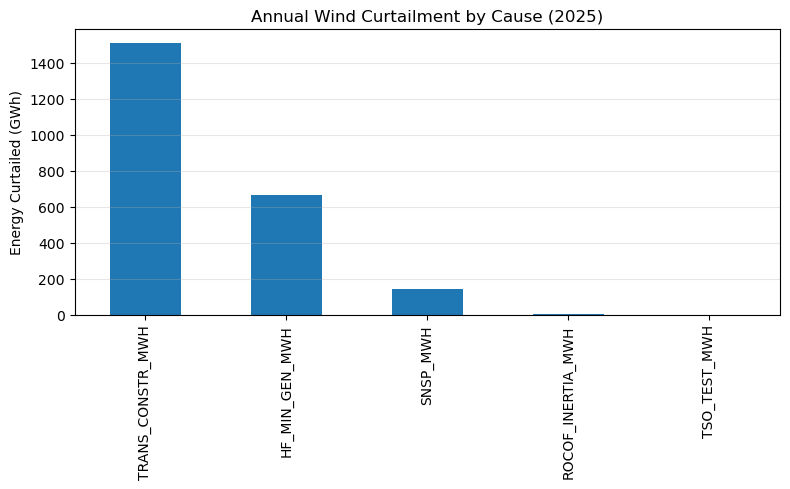

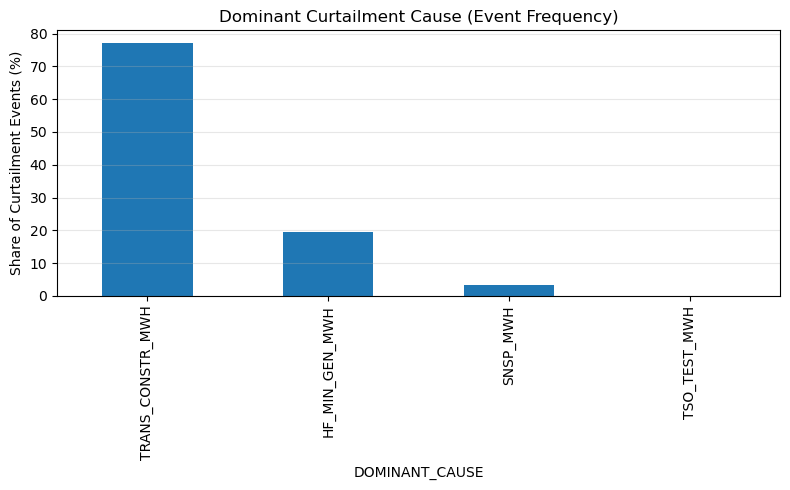

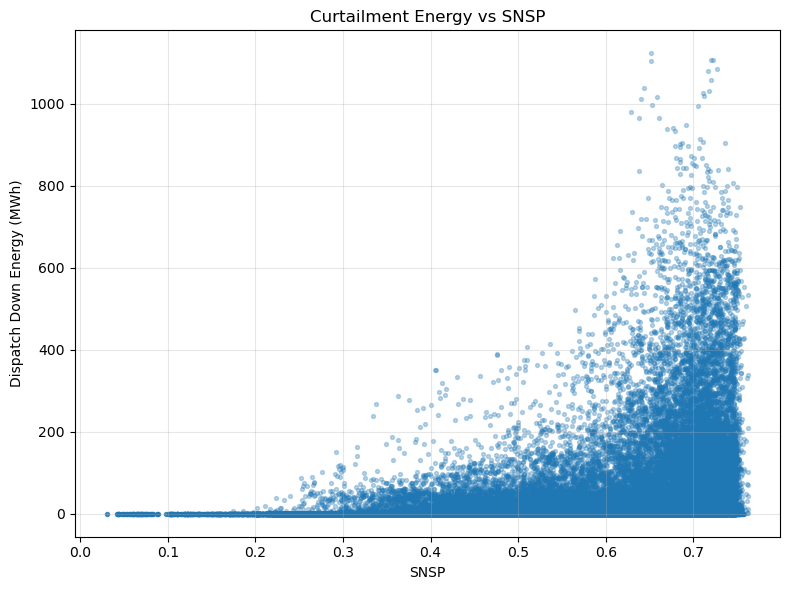

<Figure size 1000x600 with 0 Axes>

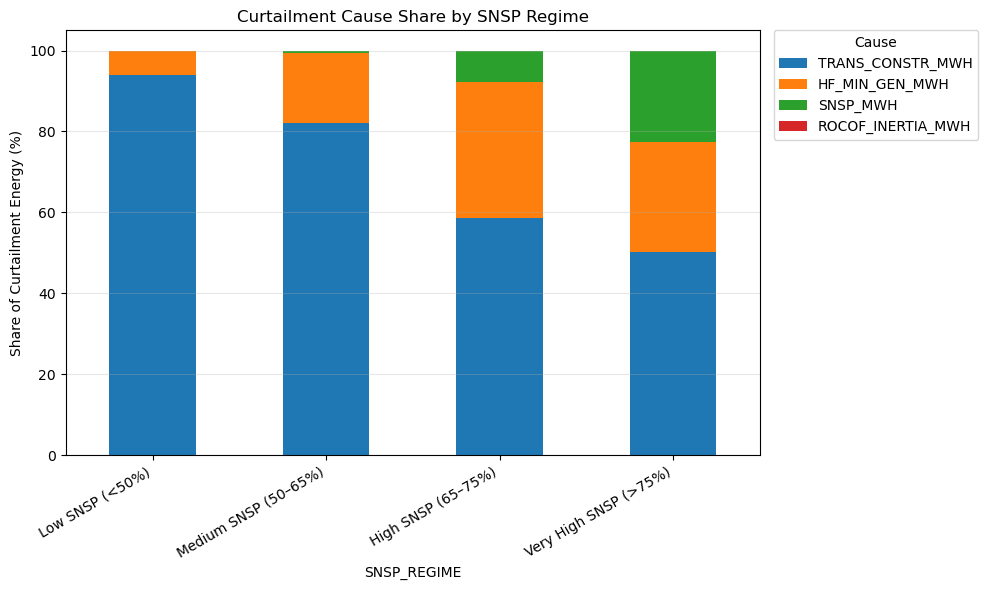

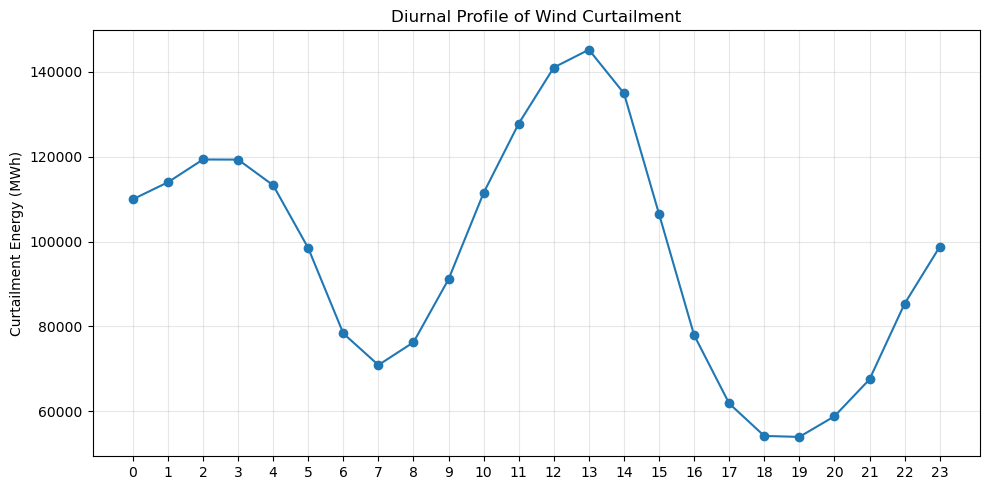

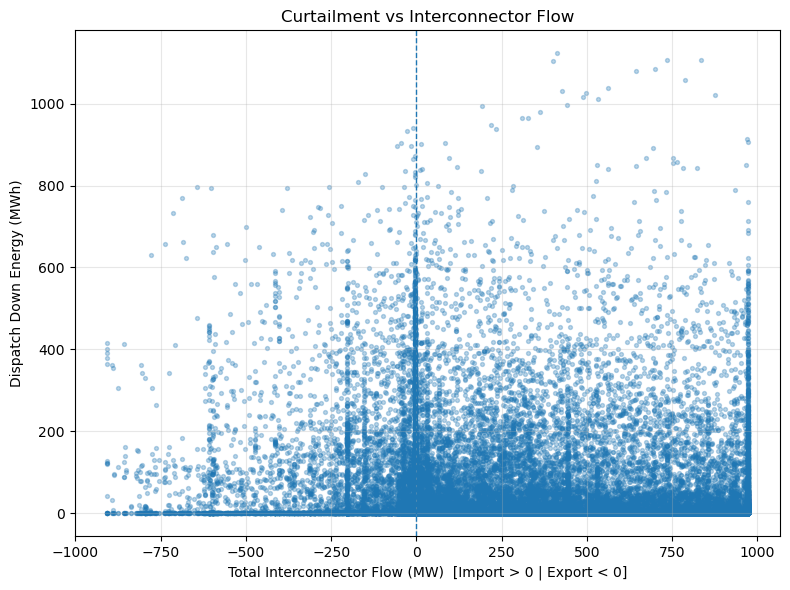

In [ ]:
# ============================
# PLOT 1 — ANNUAL CURTAILMENT ENERGY BY CAUSE
# ============================

import matplotlib.pyplot as plt

annual_gwh = (
    stage2_df[
        [
            "TRANS_CONSTR_MWH",
            "HF_MIN_GEN_MWH",
            "SNSP_MWH",
            "ROCOF_INERTIA_MWH",
            "TSO_TEST_MWH",
        ]
    ]
    .sum()
    / 1000
)

plt.figure(figsize=(8, 5))
annual_gwh.sort_values(ascending=False).plot(kind="bar")
plt.ylabel("Energy Curtailed (GWh)")
plt.title("Annual Wind Curtailment by Cause (2025)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# ============================
# PLOT 2 — DOMINANT CAUSE (EVENT FREQUENCY)
# ============================

dominant_counts = (
    df_causes[df_causes["DOMINANT_CAUSE"] != "NONE"]
    ["DOMINANT_CAUSE"]
    .value_counts(normalize=True)
    * 100
)

plt.figure(figsize=(8, 5))
dominant_counts.plot(kind="bar")
plt.ylabel("Share of Curtailment Events (%)")
plt.title("Dominant Curtailment Cause (Event Frequency)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# ============================
# PLOT 3 — TOTAL CURTAILMENT VS SNSP
# ============================

plt.figure(figsize=(8, 6))
plt.scatter(
    stage2_df["SNSP"],
    stage2_df["DD_MWH"],
    alpha=0.3,
    s=8
)
plt.xlabel("SNSP")
plt.ylabel("Dispatch Down Energy (MWh)")
plt.title("Curtailment Energy vs SNSP")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ============================
# PLOT — CAUSE SHARE BY SNSP REGIME (Improved Formatting)
# ============================

plt.figure(figsize=(10, 6))

ax = regime_share.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6)
)

plt.ylabel("Share of Curtailment Energy (%)")
plt.title("Curtailment Cause Share by SNSP Regime")
plt.xticks(rotation=30, ha="right")
plt.legend(
    title="Cause",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0
)

plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# ============================
# PLOT 5 — DIURNAL CURTAILMENT PROFILE
# ============================

stage2_df["Hour"] = stage2_df.index.hour

hourly_dd = (
    stage2_df
    .groupby("Hour")["DD_MWH"]
    .sum()
)

plt.figure(figsize=(10, 5))
plt.plot(hourly_dd.index, hourly_dd.values, marker="o")
plt.xticks(range(0, 24))
plt.ylabel("Curtailment Energy (MWh)")
plt.title("Diurnal Profile of Wind Curtailment")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ============================
# PLOT 6 — CURTAILMENT VS INTERCONNECTOR FLOW
# ============================

plt.figure(figsize=(8, 6))
plt.scatter(
    stage2_df["Total IC Flow"],
    stage2_df["DD_MWH"],
    alpha=0.3,
    s=8
)
plt.axvline(0, linestyle="--", linewidth=1)
plt.xlabel("Total Interconnector Flow (MW)  [Import > 0 | Export < 0]")
plt.ylabel("Dispatch Down Energy (MWh)")
plt.title("Curtailment vs Interconnector Flow")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [9]:
# ============================
# FINAL CELL — FREEZE STAGE 2 (CLEAN & COMPLETE)
# ============================

stage2_curtailment_model = stage2_df[
    [
        # --- System state ---
        "AI Demand",
        "AI Wind Availability",
        "AI Wind Generation",
        "AI Solar Generation",
        "SNSP",
        "SNSP_REGIME",
        "AI Oversupply",
        "Moyle I/C",
        "EWIC I/C",
        "Inter-Jurisdictional Flow",
        "Total IC Flow",
        "Hour",

        # --- Curtailment totals ---
        "DD_MWH",
        "CURTAILMENTS_MWH",
        "CONSTRAINTS_MWH",
        "OTHER_MWH",

        # --- Curtailment causes ---
        "TRANS_CONSTR_MWH",
        "HF_MIN_GEN_MWH",
        "SNSP_MWH",
        "ROCOF_INERTIA_MWH",
        "TSO_TEST_MWH",
    ]
].copy()

stage2_curtailment_model = stage2_curtailment_model.sort_index()

stage2_curtailment_model.to_csv(
    "stage2_curtailment_model_2025.csv"
)

print("Stage 2 frozen correctly.")


Stage 2 frozen correctly.
